**Linear Scaling (Normalização Min-Max): Deixando os Dados na Mesma Escala**

Imagine que você está comprando frutas em duas lojas diferentes.

* Na Loja A, as maçãs são vendidas por peso (em quilos).
* Na Loja B, as maçãs são vendidas por altura (em centímetros).

Se você quer comparar as maçãs das duas lojas, ou decidir qual é a "melhor" para um propósito específico (por exemplo, a que cabe na sua lancheira), comparar quilos com centímetros não faz sentido. Você precisa colocá-las na mesma escala, talvez em uma escala de "quão grande ela é" de 0 a 1.

O Linear Scaling faz exatamente isso com seus dados. Ele pega os valores de uma característica (como a 'Idade' ou o 'Salário') e os transforma para que todos fiquem dentro de um novo intervalo, sem mudar a relação entre eles.

Por que fazemos isso?

Muitos algoritmos de Machine Learning (como Máquinas de Vetores de Suporte, Redes Neurais, K-Means) são sensíveis à escala dos dados. Se uma característica tem valores muito grandes (ex: salário de 100.000) e outra tem valores pequenos (ex: idade de 30), a característica com valores maiores pode dominar o cálculo da distância ou da importância, fazendo com que o algoritmo ignore as características com valores menores.

O Linear Scaling ajuda a:

Evitar que uma característica domine outras: Garante que todas contribuam igualmente.
Acelerar a convergência de alguns algoritmos: Eles chegam à solução mais rápido.
Melhorar o desempenho do modelo: Ajuda o modelo a aprender melhor os padrões.

Iniciando a demonstração didática de Linear Scaling (Normalização Min-Max)...

PASSO 1: Geramos dados de clientes com 'Salário Anual' e 'Tempo de Uso do Aplicativo'.
  - Salário Anual: Mín=30000.00, Máx=107045.56, Média=68047.02
  - Tempo de Uso: Mín=21.62, Máx=114.40, Média=60.45

Observe a grande diferença entre os valores máximos/mínimos do salário e do tempo de uso.
---------------------------------------------------

PASSO 2: Aplicamos o Linear Scaling (Normalização Min-Max).
  -> Esta técnica vai 'espremer' os valores de cada característica para um novo intervalo, geralmente entre 0 e 1.
  -> A fórmula é: (valor_original - valor_minimo) / (valor_maximo - valor_minimo)

Dados após Linear Scaling:
  - Salário Anual Escalado: Mín=0.00, Máx=1.00, Média=0.49
  - Tempo de Uso Escalado: Mín=0.00, Máx=1.00, Média=0.42
Observe que, embora os valores originais fossem muito diferentes, agora ambos estão entre 0 e 1.
---------------------------------------------------

PASSO 3: Visualizamos 

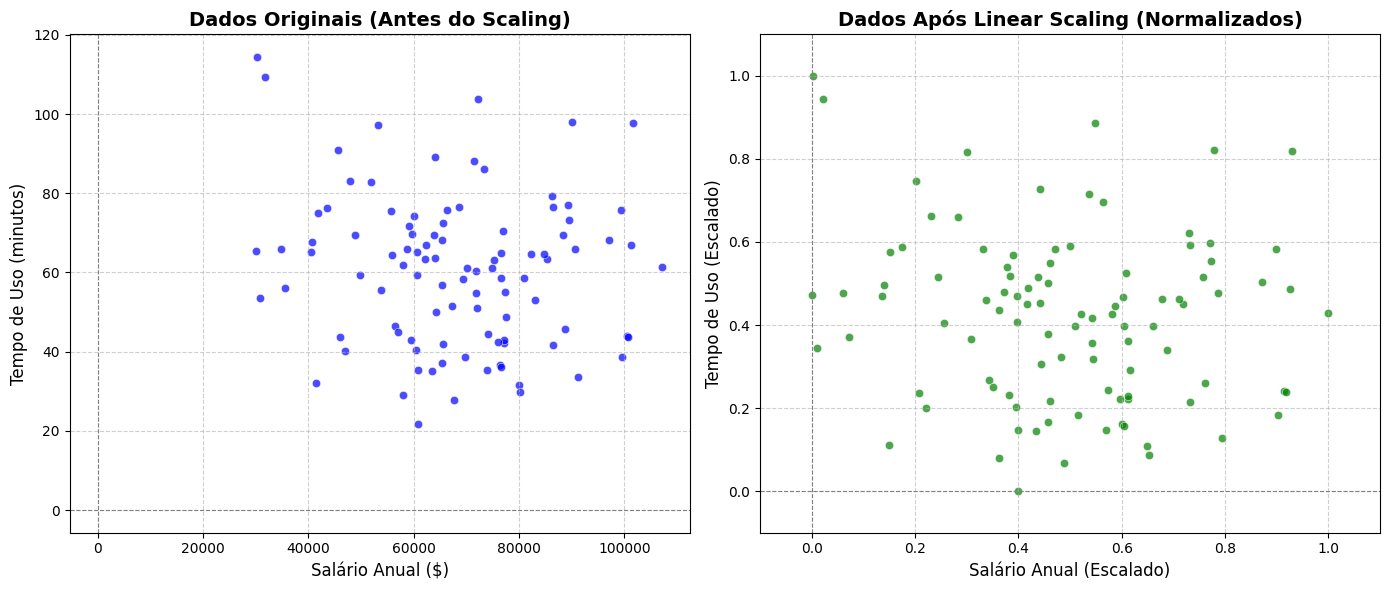


--- RESUMO FINAL ---
Observe nos gráficos:
- No gráfico 'Dados Originais', o 'Salário Anual' domina o eixo horizontal por ter valores muito maiores.
- No gráfico 'Dados Após Linear Scaling', ambos os eixos estão na mesma escala (0 a 1).
Isso significa que, para um algoritmo de Machine Learning, 'Salário' e 'Tempo de Uso' agora têm a mesma 'importância' em termos de magnitude de valores, permitindo que o algoritmo aprenda de forma mais justa e eficiente.
Linear Scaling é como dar um 'zoom' e ajustar cada característica para caber em uma mesma 'janela', mantendo as proporções internas intactas.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

print("Iniciando a demonstração didática de Linear Scaling (Normalização Min-Max)...\n")

# --- 1. Geração de Dados Sintéticos ---
np.random.seed(42)
num_clientes = 100

# Característica 1: Salário Anual (valores altos)
# Ex: entre 30.000 e 120.000
salarios = np.random.normal(loc=70000, scale=20000, size=num_clientes)
salarios[salarios < 30000] = 30000 # Garantir um mínimo
salarios[salarios > 120000] = 120000 # Garantir um máximo

# Característica 2: Tempo de Uso do Aplicativo (minutos por dia) (valores baixos)
# Ex: entre 10 e 120 minutos
tempo_uso = np.random.normal(loc=60, scale=20, size=num_clientes)
tempo_uso[tempo_uso < 10] = 10
tempo_uso[tempo_uso > 120] = 120

# Juntamos as características em um array para o pré-processamento
dados_originais = np.column_stack((salarios, tempo_uso))

print("PASSO 1: Geramos dados de clientes com 'Salário Anual' e 'Tempo de Uso do Aplicativo'.")
print(f"  - Salário Anual: Mín={salarios.min():.2f}, Máx={salarios.max():.2f}, Média={salarios.mean():.2f}")
print(f"  - Tempo de Uso: Mín={tempo_uso.min():.2f}, Máx={tempo_uso.max():.2f}, Média={tempo_uso.mean():.2f}\n")
print("Observe a grande diferença entre os valores máximos/mínimos do salário e do tempo de uso.")
print("---------------------------------------------------\n")

# --- 2. Aplicação do Linear Scaling (Normalização Min-Max) ---
# Usamos o MinMaxScaler do scikit-learn, que é a implementação padrão.

print("PASSO 2: Aplicamos o Linear Scaling (Normalização Min-Max).")
print("  -> Esta técnica vai 'espremer' os valores de cada característica para um novo intervalo, geralmente entre 0 e 1.")
print("  -> A fórmula é: (valor_original - valor_minimo) / (valor_maximo - valor_minimo)\n")

scaler = MinMaxScaler()
dados_escalados = scaler.fit_transform(dados_originais)

# Após o escalonamento, os dados estarão no intervalo [0, 1]
salarios_escalados = dados_escalados[:, 0]
tempo_uso_escalado = dados_escalados[:, 1]

print("Dados após Linear Scaling:")
print(f"  - Salário Anual Escalado: Mín={salarios_escalados.min():.2f}, Máx={salarios_escalados.max():.2f}, Média={salarios_escalados.mean():.2f}")
print(f"  - Tempo de Uso Escalado: Mín={tempo_uso_escalado.min():.2f}, Máx={tempo_uso_escalado.max():.2f}, Média={tempo_uso_escalado.mean():.2f}")
print("Observe que, embora os valores originais fossem muito diferentes, agora ambos estão entre 0 e 1.")
print("---------------------------------------------------\n")

# --- 3. Visualização Comparativa ---

print("PASSO 3: Visualizamos os dados ANTES e DEPOIS do Linear Scaling.")
print("  -> O gráfico mostra que a 'forma' da distribuição dos dados não mudou, apenas a escala.")

plt.figure(figsize=(14, 6))

# Gráfico para os dados originais
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.scatterplot(x=dados_originais[:, 0], y=dados_originais[:, 1], color='blue', alpha=0.7)
plt.title('Dados Originais (Antes do Scaling)', fontsize=14, weight='bold')
plt.xlabel('Salário Anual ($)', fontsize=12)
plt.ylabel('Tempo de Uso (minutos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Linha no zero para referência
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Gráfico para os dados escalados
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
sns.scatterplot(x=dados_escalados[:, 0], y=dados_escalados[:, 1], color='green', alpha=0.7)
plt.title('Dados Após Linear Scaling (Normalizados)', fontsize=14, weight='bold')
plt.xlabel('Salário Anual (Escalado)', fontsize=12)
plt.ylabel('Tempo de Uso (Escalado)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-0.1, 1.1) # Ajusta os limites para mostrar o intervalo 0-1
plt.ylim(-0.1, 1.1)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

print("\n--- RESUMO FINAL ---")
print("Observe nos gráficos:")
print("- No gráfico 'Dados Originais', o 'Salário Anual' domina o eixo horizontal por ter valores muito maiores.")
print("- No gráfico 'Dados Após Linear Scaling', ambos os eixos estão na mesma escala (0 a 1).")
print("Isso significa que, para um algoritmo de Machine Learning, 'Salário' e 'Tempo de Uso' agora têm a mesma 'importância' em termos de magnitude de valores, permitindo que o algoritmo aprenda de forma mais justa e eficiente.")
print("Linear Scaling é como dar um 'zoom' e ajustar cada característica para caber em uma mesma 'janela', mantendo as proporções internas intactas.")